In [1]:
import nltk, re, pprint
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pprint, time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize

In [2]:
nltk.download('treebank')
nltk.download('universal_tagset')

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [3]:
wsj = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))

In [4]:
print(wsj[:40])

[[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')], [('Mr.', 'NOUN'), ('Vinken', 'NOUN'), ('is', 'VERB'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Elsevier', 'NOUN'), ('N.V.', 'NOUN'), (',', '.'), ('the', 'DET'), ('Dutch', 'NOUN'), ('publishing', 'VERB'), ('group', 'NOUN'), ('.', '.')], [('Rudolph', 'NOUN'), ('Agnew', 'NOUN'), (',', '.'), ('55', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), ('and', 'CONJ'), ('former', 'ADJ'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Consolidated', 'NOUN'), ('Gold', 'NOUN'), ('Fields', 'NOUN'), ('PLC', 'NOUN'), (',', '.'), ('was', 'VERB'), ('named', 'VERB'), ('*-1', 'X'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('of', 'ADP'), ('this', 'DET'), ('British', 'ADJ'), ('industrial', 'ADJ'), ('

In [5]:
random.seed(1234)
train_set, test_set = train_test_split(wsj,test_size=0.05)

print(len(train_set))
print(len(test_set))
print(train_set[:40])

3718
196
[[('*-2', 'X'), ('Reached', 'VERB'), ('*-1', 'X'), ('at', 'ADP'), ('his', 'PRON'), ('office', 'NOUN'), (',', '.'), ('Mr.', 'NOUN'), ('McFall', 'NOUN'), (',', '.'), ('currently', 'ADV'), ('chairman', 'NOUN'), (',', '.'), ('said', 'VERB'), (',', '.'), ('``', '.'), ('An', 'DET'), ('implication', 'NOUN'), ('that', 'ADP'), ('we', 'PRON'), ('failed', 'VERB'), ('*-3', 'X'), ('to', 'PRT'), ('return', 'VERB'), ('investor', 'NOUN'), ('funds', 'NOUN'), ('is', 'VERB'), ('inappropriate', 'ADJ'), ('and', 'CONJ'), ('inaccurate', 'ADJ'), ('.', '.'), ("''", '.')], [('*-1', 'X'), ('Currently', 'ADV'), ('a', 'DET'), ('$', '.'), ('300', 'NUM'), ('million-a-year', 'ADJ'), ('business', 'NOUN'), (',', '.'), ('900', 'NUM'), ('telephone', 'NOUN'), ('service', 'NOUN'), ('is', 'VERB'), ('expected', 'VERB'), ('*-1', 'X'), ('to', 'PRT'), ('hit', 'VERB'), ('$', '.'), ('500', 'NUM'), ('million', 'NUM'), ('*U*', 'X'), ('next', 'ADJ'), ('year', 'NOUN'), ('and', 'CONJ'), ('near', 'ADP'), ('$', '.'), ('2', 'NUM

In [6]:
train_tagged_words = [tup for sent in train_set for tup in sent]
len(train_tagged_words)

95565

In [7]:
tokens = [pair[0] for pair in train_tagged_words]
tokens[:10]

['*-2', 'Reached', '*-1', 'at', 'his', 'office', ',', 'Mr.', 'McFall', ',']

In [8]:
V = set(tokens)
print(len(V))

12089


In [9]:
T = set([pair[1] for pair in train_tagged_words])
len(T)

12

In [10]:
print(T)

{'CONJ', 'ADV', '.', 'DET', 'ADP', 'VERB', 'PRT', 'X', 'NOUN', 'NUM', 'ADJ', 'PRON'}


In [11]:
t = len(T)
v = len(V)
w_given_t = np.zeros((t, v))

In [12]:
def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
    count_w_given_tag = len(w_given_tag_list)

    return (count_w_given_tag, count_tag)

In [13]:
print("\n", "large")
print(word_given_tag('large', 'ADJ'))
print(word_given_tag('large', 'VERB'))
print(word_given_tag('large', 'NOUN'), "\n")

# will
print("\n", "will")
print(word_given_tag('will', 'MD'))
print(word_given_tag('will', 'NOUN'))
print(word_given_tag('will', 'VERB'))

# book
print("\n", "book")
print(word_given_tag('book', 'NOUN'))
print(word_given_tag('book', 'VERB'))


 large
(26, 6083)
(0, 12891)
(0, 27383) 


 will
(0, 0)
(1, 27383)
(260, 12891)

 book
(7, 27383)
(1, 12891)


In [14]:
word_given_tag('Twitter','NOUN')

(0, 27383)

In [15]:
def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

In [16]:
print(t2_given_t1(t2='NOUN', t1='ADJ'))
print(t2_given_t1('ADJ', 'NOUN'))
print(t2_given_t1('NOUN', 'DET'))
print(t2_given_t1('NOUN', 'VERB'))
print(t2_given_t1(',', 'NOUN'))
print(t2_given_t1('PRT', 'PRT'))
print(t2_given_t1('VERB', 'NOUN'))

(4256, 6083)
(325, 27383)
(5277, 8279)
(1423, 12891)
(0, 27383)
(6, 3065)
(4043, 27383)


In [17]:
print(t2_given_t1('DET', '.'))
print(t2_given_t1('VERB', '.'))
print(t2_given_t1('NOUN', '.'))
print(t2_given_t1('NOUN', '.'))


(1929, 11136)
(985, 11136)
(2487, 11136)
(2487, 11136)


In [18]:
t2_given_t1('VERB','DET')

(328, 8279)

In [19]:
tags_matrix = np.zeros((len(T), len(T)), dtype='float32')
for i, t1 in enumerate(list(T)):
    for j, t2 in enumerate(list(T)):
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]

In [20]:
tags_matrix

array([[4.61893767e-04, 5.49653582e-02, 3.55658196e-02, 1.22863740e-01,
        5.40415719e-02, 1.56120092e-01, 5.08083124e-03, 8.77598114e-03,
        3.42263281e-01, 4.24942262e-02, 1.16859123e-01, 6.05080836e-02],
       [7.32356869e-03, 7.95605853e-02, 1.35818914e-01, 6.75765648e-02,
        1.18841544e-01, 3.46537948e-01, 1.36484690e-02, 2.43009329e-02,
        2.99600530e-02, 3.09587214e-02, 1.30159780e-01, 1.53129157e-02],
       [5.88182472e-02, 5.25323264e-02, 9.41989943e-02, 1.73221976e-01,
        9.00682434e-02, 8.84518698e-02, 2.51436792e-03, 2.69396547e-02,
        2.23329738e-01, 8.00107792e-02, 4.42708321e-02, 6.55531585e-02],
       [4.83150128e-04, 1.26826912e-02, 1.72726177e-02, 5.67701412e-03,
        9.42142773e-03, 3.96183096e-02, 2.41575064e-04, 4.54161130e-02,
        6.37395799e-01, 2.22249068e-02, 2.06063539e-01, 3.50283855e-03],
       [8.56806233e-04, 1.29591944e-02, 3.89846861e-02, 3.24515373e-01,
        1.71361249e-02, 8.24675988e-03, 1.49941095e-03, 3.39

In [21]:
tags_df = pd.DataFrame(tags_matrix, columns = list(T), index=list(T))

In [22]:
tags_df

,CONJ,ADV,.,DET,ADP,VERB,PRT,X,NOUN,NUM,ADJ,PRON
CONJ,0.000462,0.054965,0.035566,0.122864,0.054042,0.156120,0.005081,0.008776,0.342263,0.042494,0.116859,0.060508
ADV,0.007324,0.079561,0.135819,0.067577,0.118842,0.346538,0.013648,0.024301,0.029960,0.030959,0.130160,0.015313
.,0.058818,0.052532,0.094199,0.173222,0.090068,0.088452,0.002514,0.026940,0.223330,0.080011,0.044271,0.065553
DET,0.000483,0.012683,0.017273,0.005677,0.009421,0.039618,0.000242,0.045416,0.637396,0.022225,0.206064,0.003503
ADP,0.000857,0.012959,0.038985,0.324515,0.017136,0.008247,0.001499,0.033951,0.324194,0.062654,0.106994,0.068009
VERB,0.005663,0.082073,0.035141,0.133737,0.091071,0.169188,0.031340,0.217826,0.110387,0.023272,0.065317,0.034986
PRT,0.002284,0.009462,0.043067,0.102121,0.019902,0.402284,0.001958,0.014029,0.243719,0.058401,0.085155,0.017618
X,0.010516,0.025653,0.165392,0.054175,0.144678,0.202040,0.185946,0.075048,0.060867,0.002709,0.016571,0.056405
NOUN,0.042691,0.016799,0.240149,0.013183,0.176679,0.147646,0.043859,0.029580,0.263631,0.009458,0.011869,0.004455
NUM,0.013678,0.002676,0.117455,0.002974,0.033601,0.019031,0.028249,0.207255,0.355932,0.182872,0.034493,0.001784


In [23]:
tags_df.loc['.', :]

CONJ    0.058818
ADV     0.052532
.       0.094199
DET     0.173222
ADP     0.090068
VERB    0.088452
PRT     0.002514
X       0.026940
NOUN    0.223330
NUM     0.080011
ADJ     0.044271
PRON    0.065553
Name: ., dtype: float32

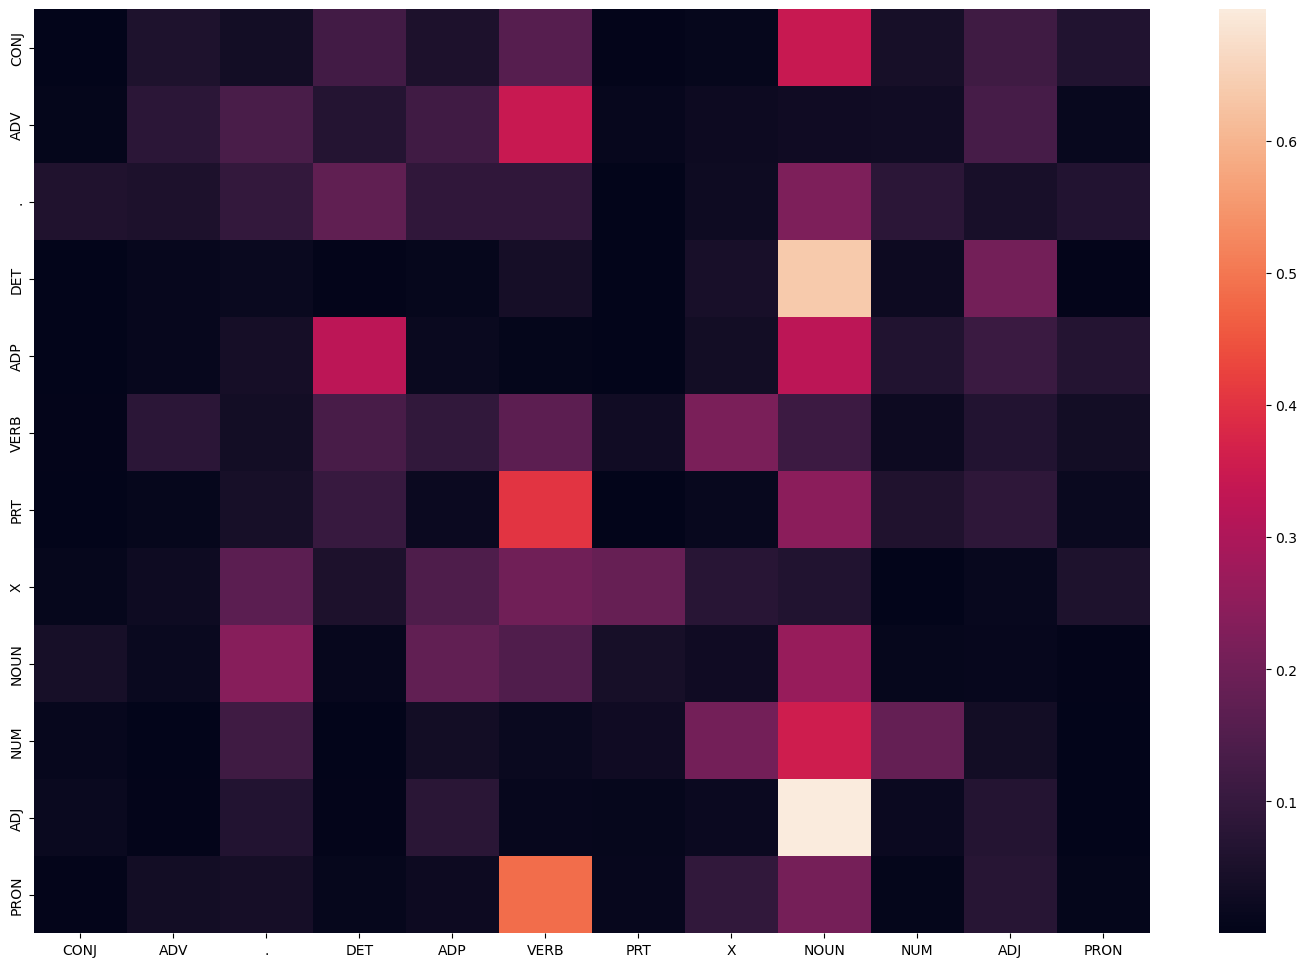

In [24]:
plt.figure(figsize=(18, 12))
sns.heatmap(tags_df)
plt.show()

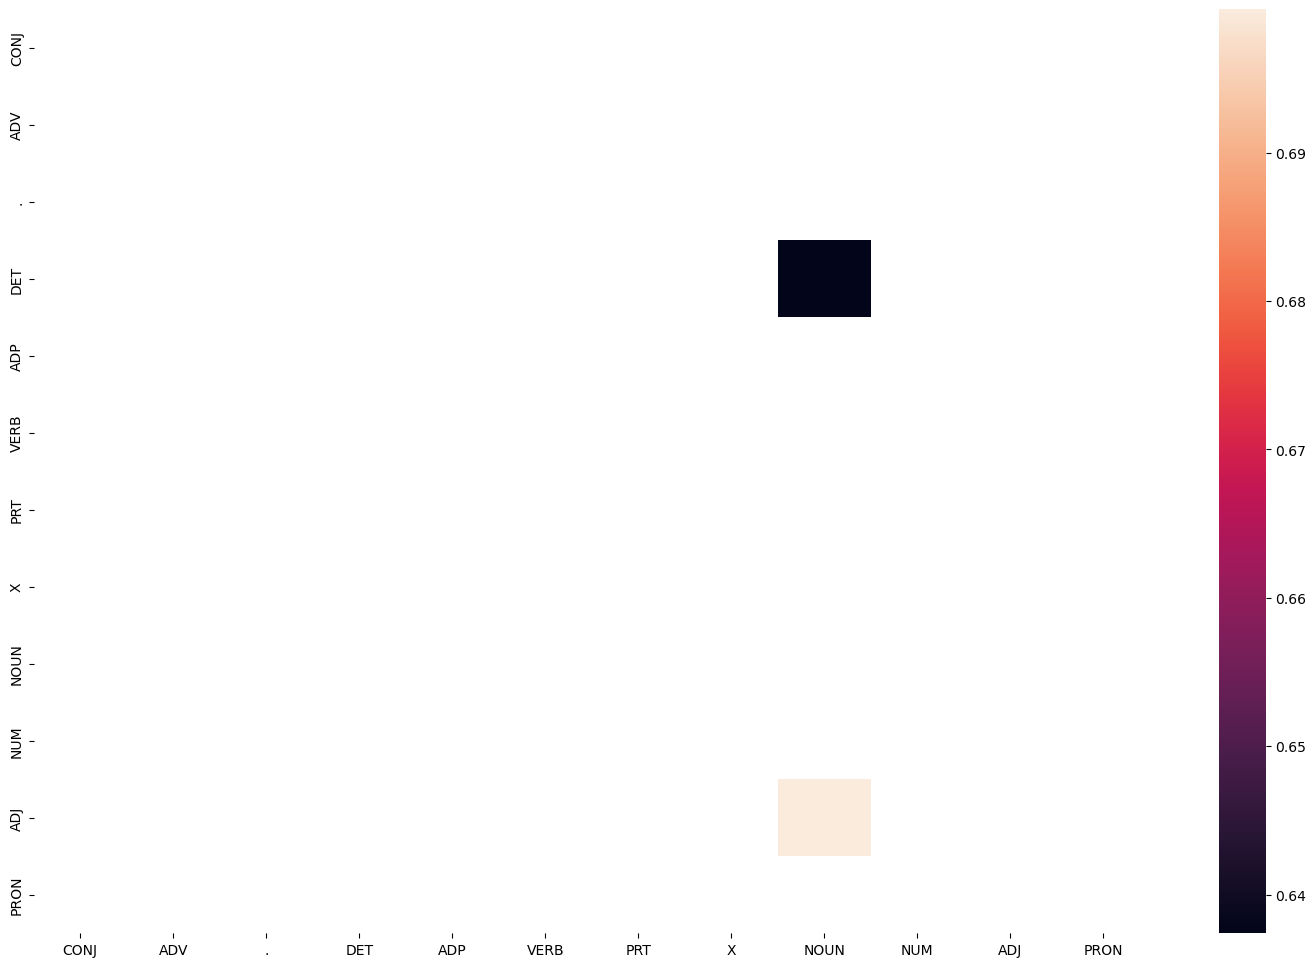

In [25]:
tags_frequent = tags_df[tags_df>0.5]
plt.figure(figsize=(18, 12))
sns.heatmap(tags_frequent)
plt.show()

In [26]:
def Viterbi_vanilla(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))

    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = []
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]

            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p
            p.append(state_probability)

        #print('word is {} and list is {}'.format(word,p))
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)]
        state.append(state_max)
    return list(zip(words, state))

In [27]:
def Viterbi_smoothed(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))

    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = []
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]

            # compute emission and state probabilities
            emission_p = 0.000001+word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]+0.000001*len(T)
            state_probability = emission_p * transition_p
            p.append(state_probability)

        #print('word is {} and list is {}'.format(word,p))
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)]
        state.append(state_max)
    return list(zip(words, state))


In [28]:
def find_state(word):
    #punc=['"',"'",',','.','(',')','?','[',']',':',';']
    xc=['*']
    if re.search(r'.*(ing|ed|es|ould)$',word.lower()):
        return 'VERB'
    elif re.search(r'to$',str(word).lower()):
        return 'PRT'
    elif re.search(r'^-?[0-9]+(.[0-9]+)?\.*$',str(word).lower()):
        return 'NUM'
    elif '*' in word:
        return 'X'
    elif re.search(r'.*\'s$',word.lower()):
        return 'NOUN'
    elif re.search(r'.*ness$',word.lower()):
        return 'NOUN'
    elif re.search(r'(The|the|A|a|An|an)$',word):
        return 'ADP'
    elif re.search(r'.*able$',word.lower()):
        return 'ADJ'
    elif re.search(r'.*ly$',word.lower()):
        return 'ADV'
    elif re.search(r'(He|he|She|she|It|it|I|me|Me|You|you|His|his|Her|her|Its|its|my|Your|your|Yours|yours)$',word):
        return 'PRON'
    elif re.search(r'(on|On|at|At|since|Since|For|for|Ago|ago|before|Before|till|Till|until|Until|by|By|Beside|beside|under|Under|below|Below|over|Over|above|Above|across|Across|Through|through|Into|into|towards|Towards|onto|Onto|from|From)$',word):
        return 'ADP'
    elif re.search(r'',word):
        return 'NOUN'
    elif re.search(r'(\'|\"|\.|\(|\)|\?|\[|\]|\:|\;)+',word):
        return '.'
    else:
        return 'NOUN'
    
def Viterbi_manual(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))

    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = []
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]

            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p
            p.append(state_probability)

        #print('word is {} and list is {}'.format(word,p))
        pmax = max(p)
        if pmax==0.0:
            state_word=find_state(word)
            state.append(state_word)
            #print(word,':',state_word)
        else:
        # getting state for which probability is maximum
            state_max = T[p.index(pmax)]
            state.append(state_max)
    return list(zip(words, state))


In [29]:
def Viterbi_common(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))

    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = []
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]

            # compute emission and state probabilities
            if word in tokens:
                emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            else:
                emission_p=1
            state_probability = emission_p * transition_p
            p.append(state_probability)

        #print('word is {} and list is {}'.format(word,p))
        pmax = max(p)
        if pmax==0.0:
            state_word='NOUN'
            state.append(state_word)
            #print(word,':',state_word)
        else:
        # getting state for which probability is maximum
            state_max = T[p.index(pmax)]
            state.append(state_max)
    return list(zip(words, state))


In [30]:
def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))

    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = []
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]

            # compute emission and state probabilities
            if word in tokens:
                emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            else:
                emission_p=1
            state_probability = emission_p * transition_p
            p.append(state_probability)

        #print('word is {} and list is {}'.format(word,p))
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)]
        state.append(state_max)
    return list(zip(words, state))



In [31]:
test_run_base = [tup for sent in test_set for tup in sent]

# list of untagged words
test_tagged_words = [tup[0] for sent in test_set for tup in sent]
test_run_base

[('Until', 'ADP'),
 ('now', 'ADV'),
 (',', '.'),
 ('however', 'ADV'),
 (',', '.'),
 ('buyers', 'NOUN'),
 ('who', 'PRON'),
 ('*T*-53', 'X'),
 ('wanted', 'VERB'),
 ('*-1', 'X'),
 ('to', 'PRT'),
 ('finance', 'VERB'),
 ('part', 'NOUN'),
 ('of', 'ADP'),
 ('a', 'DET'),
 ('car', 'NOUN'),
 ('purchase', 'NOUN'),
 ('through', 'ADP'),
 ('General', 'NOUN'),
 ('Motors', 'NOUN'),
 ('Acceptance', 'NOUN'),
 ('Corp.', 'NOUN'),
 ('could', 'VERB'),
 ("n't", 'ADV'),
 ('put', 'VERB'),
 ('their', 'PRON'),
 ('down', 'NOUN'),
 ('payment', 'NOUN'),
 ('on', 'ADP'),
 ('a', 'DET'),
 ('charge', 'NOUN'),
 ('card', 'NOUN'),
 ('because', 'ADP'),
 ('of', 'ADP'),
 ('possible', 'ADJ'),
 ('conflicts', 'NOUN'),
 ('with', 'ADP'),
 ('truth-in-lending', 'NOUN'),
 ('and', 'CONJ'),
 ('state', 'NOUN'),
 ('disclosure', 'NOUN'),
 ('laws', 'NOUN'),
 ('over', 'ADP'),
 ('finance', 'NOUN'),
 ('rates', 'NOUN'),
 (',', '.'),
 ('says', 'VERB'),
 ('*T*-2', 'X'),
 ('a', 'DET'),
 ('spokesman', 'NOUN'),
 ('for', 'ADP'),
 ('the', 'DET'),
 ('

In [32]:
start = time.time()
tagged_seq_sm = Viterbi_manual(test_tagged_words)
check = [i for i, j in zip(tagged_seq_sm, test_run_base) if i == j]
accuracy = len(check)/len(tagged_seq_sm)
end = time.time()
print('Time Taken:',end-start)
print('Accuracy is :',accuracy)

Time Taken: 1027.0402274131775
Accuracy is : 0.955781647427118


In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
pip install flask

In [35]:
pip install flask_ngrok

Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install pyngrok==4.1.1

Note: you may need to restart the kernel to use updated packages.


In [37]:
!ngrok authtoken 2Xvbu2vLl1Kw1R0FvCmParMl0Pw_51568BWdRqQm21h4DQA2c

Authtoken saved to configuration file: C:\Users\Dell/.ngrok2/ngrok.yml


In [ ]:
# Importing necessary libraries
from flask import Flask, render_template, request
from flask_ngrok import run_with_ngrok
# Creating a Flask app
app = Flask(__name__,template_folder='C:\\Users\\Dell\\pos-tagging')
run_with_ngrok(app)
# Define a route for the home page
@app.route('/', methods=['GET', 'POST'])
def index():
    if request.method == 'POST':
        # Get the user input from the form
        user_input = request.form['sentence']
        words = word_tokenize(user_input)
        #start = time.time()
        tagged_seq = Viterbi_manual(words)
        #end = time.time()
        difference = end-start
        #print('Time Taken:',difference)
        print('Tagged sequence is:',tagged_seq,'\n\n')
        processed_input = f"Tagged sentence : {tagged_seq}"

        # Render the result page with the processed input
        return render_template('result.html', result=processed_input)
    # If the request method is GET, render the home page
    return render_template('index.html')
def display(tagged_seq):
    processed_input = f"Tagged-sentence: {tagged_seq}"
    return render_template('result.html', result=processed_input)
    
# Run the app
app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
Exception in thread Thread-13:
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\Lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Dell\anaconda3\Lib\site-packages\urllib3\util\connection.py", line 95, in create_connection
    raise err
  File "C:\Users\Dell\anaconda3\Lib\site-packages\urllib3\util\connection.py", line 85, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\Lib\site-packages\urllib3\connectionpool.py", line 714, in urlopen
    httplib_response = self._make_request(
                       ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Dell\anaconda3\Lib\sit

Tagged sequence is: [('Java', 'ADP'), ('is', 'VERB'), ('a', 'DET'), ('programming', 'NOUN'), ('language', 'NOUN'), ('.', '.')] 




127.0.0.1 - - [14/Mar/2024 19:10:16] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Mar/2024 19:10:16] "GET /b.css HTTP/1.1" 404 -
127.0.0.1 - - [14/Mar/2024 20:34:15] "POST / HTTP/1.1" 200 -


Tagged sequence is: [('I', 'PRON'), ('like', 'VERB'), ('mangoes', 'VERB'), ('.', '.')] 




127.0.0.1 - - [14/Mar/2024 20:34:38] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Mar/2024 20:34:38] "GET /b.css HTTP/1.1" 404 -
127.0.0.1 - - [14/Mar/2024 20:38:19] "POST / HTTP/1.1" 200 -


Tagged sequence is: [('Java', 'ADP'), ('is', 'VERB'), ('a', 'DET'), ('programming', 'NOUN'), ('language', 'NOUN'), ('.', '.')] 




127.0.0.1 - - [14/Mar/2024 20:38:21] "POST / HTTP/1.1" 200 -


Tagged sequence is: [('Java', 'ADP'), ('is', 'VERB'), ('a', 'DET'), ('programming', 'NOUN'), ('language', 'NOUN'), ('.', '.')] 




127.0.0.1 - - [14/Mar/2024 20:39:00] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Mar/2024 20:39:00] "GET /b.css HTTP/1.1" 404 -
127.0.0.1 - - [14/Mar/2024 20:45:55] "POST / HTTP/1.1" 200 -


Tagged sequence is: [('I', 'PRON'), ('like', 'VERB'), ('Mangoes', 'VERB'), ('.', '.')] 




127.0.0.1 - - [14/Mar/2024 20:46:00] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Mar/2024 20:46:00] "GET /b.css HTTP/1.1" 404 -
